In [ ]:
from sklearn.svm import SVC
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets



iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

#wx+b = 0 is the decision boundary => x2 = (-b -w1x1)/w2
w = svm_clf.coef_
b = svm_clf.intercept_
x1 = np.array([1.9, 3])
x2 = -1 * ( b + w[0][0]*x1)/ w[0][1]



plt.plot(X[:,0][y==0], X[:,1][y==0], 'bs')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'yo')
plt.plot(x1,x2)
#print(X[0:5,0])

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica
svmclf = LinearSVC(C=1, loss="hinge", random_state=42)

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", svmclf),
    ])

svm_clf.fit(X, y)


In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
plt.plot(X[:,0][y==0], X[:,1][y==0], 'bo')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'yo')

svmd = LinearSVC(C=10, loss="hinge", random_state=42)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", svmd)
    ])

polynomial_svm_clf.fit(X, y)


# #
# from sklearn.svm import SVC

# poly_kernel_svm_clf = Pipeline([
#         ("scaler", StandardScaler()),
#         ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
#     ])
# poly_kernel_svm_clf.fit(X, y)



In [ ]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    print(off_margin)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

#--------
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel = 'poly', degree = 2,  C = 100, epsilon = 0.1)
svm_poly_reg.fit(X, y)

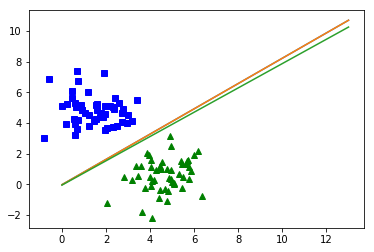

In [25]:
#Q8

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

#X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 5))

svmclf = LinearSVC(C= 2,loss="hinge", random_state=42)


svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", svmclf ),
    ])
svm_clf.fit(X,y)


w = svmclf.coef_
b = svmclf.intercept_
x1 = np.array([0, 13])
x2 = -1 * ( b + w[0][0]*x1)/ w[0][1]

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.plot(x1,x2)


#-----

from sklearn.svm import SVC

svc_kernel = SVC(kernel = 'linear', C = 2)

svm_clf2 = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", svc_kernel ),
    ])

svm_clf2.fit(X,y)


w2 = svmclf.coef_
b2 = svmclf.intercept_
x1 = np.array([0, 13])
x2 = -1 * ( b2 + w2[0][0]*x1)/ w2[0][1]

plt.plot(x1,x2)

#-----------
from sklearn.linear_model import SGDClassifier

m = 100
C = 2

sgd = SGDClassifier(loss = 'hinge', alpha = 1/m*C,  tol= np.inf)

svm_clf3 = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", sgd),
    ])

svm_clf3.fit(X,y)

w3 = sgd.coef_
b3 = sgd.intercept_
xx = np.array([0, 13])
xy = -1 * ( b3 + w3[0][0]*xx)/ w3[0][1]


plt.plot(xx,xy)



In [ ]:
#Q9
